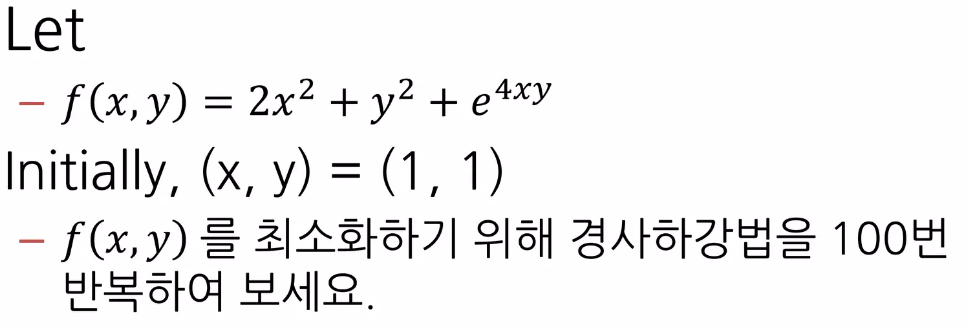

## 학습에 사용할 변수를 직접 설정  

In [20]:
import torch
from torch.autograd import Variable
import math

# Define variables with requires_grad=True
x_t = Variable(torch.tensor(1., dtype=torch.float32), requires_grad=True)
y_t = Variable(torch.tensor(1., dtype=torch.float32), requires_grad=True)
x_m = Variable(torch.tensor(1., dtype=torch.float32), requires_grad=True)
y_m = Variable(torch.tensor(1., dtype=torch.float32), requires_grad=True)

# Create an optimizer for stochastic gradient descent (SGD)
optimizer_torch = torch.optim.SGD(params=[x_t, y_t], lr=0.0001)
optimizer_math = torch.optim.SGD(params=[x_m, y_m], lr=0.0001)

EPOCHS = 10000

In [21]:
# torch.exp일 때의 학습

for epoch in range(EPOCHS):
  # Forward Propagation
  f = 2 * (x_t ** 2) + y_t**2 + torch.exp(4 * x_t * y_t)

  # Backward Propagation
  optimizer_torch.zero_grad()
  f.backward()
  optimizer_torch.step()

  # Print the loss every 1000 epochs
  if epoch % 1000 == 0:
      print(f'Epoch {epoch}, Loss: {f.item()}')

Epoch 0, Loss: 57.598148345947266
Epoch 1000, Loss: 1.4003691673278809
Epoch 2000, Loss: 1.0741093158721924
Epoch 3000, Loss: 1.007949948310852
Epoch 4000, Loss: 0.9908824563026428
Epoch 5000, Loss: 0.9848322868347168
Epoch 6000, Loss: 0.9812718033790588
Epoch 7000, Loss: 0.9782090187072754
Epoch 8000, Loss: 0.975212812423706
Epoch 9000, Loss: 0.9722402691841125


In [22]:
# math.exp일 때의 학습

for epoch in range(EPOCHS):
  # Forward Propagation
  g = 2 * (x_m ** 2) + y_m**2 + math.exp(4 * x_m * y_m)

  # Backward Propagation
  optimizer_math.zero_grad()
  g.backward()
  optimizer_math.step()

  # Print the loss every 1000 epochs
  if epoch % 1000 == 0:
      print(f'Epoch {epoch}, Loss: {g.item()}')

Epoch 0, Loss: 57.598148345947266
Epoch 1000, Loss: 10.549077987670898
Epoch 2000, Loss: 4.188173294067383
Epoch 3000, Loss: 2.4192326068878174
Epoch 4000, Loss: 1.720580816268921
Epoch 5000, Loss: 1.3921525478363037
Epoch 6000, Loss: 1.222558617591858
Epoch 7000, Loss: 1.1299539804458618
Epoch 8000, Loss: 1.0775078535079956
Epoch 9000, Loss: 1.0470188856124878


## Torch.exp와 Math.exp일때의 결과 차이

In [24]:
# torch.exp 일때
print('Final values:')
print(f'x: {x_t.item()}, y: {y_t.item()}, f: {f.item()}')

Final values:
x: -0.1597098559141159, y: 0.21162022650241852, f: 0.9693491458892822


In [25]:
# math.exp 일때
print('Final values:')
print(f'x: {x_m.item()}, y: {y_m.item()}, f: {g.item()}')

Final values:
x: 0.018301047384738922, y: 0.1353081613779068, f: 1.0289462804794312


## 왜 torch.exp와 math.exp의 결과가 다를까?

In [26]:
a = torch.tensor([3.0])
a_exp = torch.exp(a)
print(a, a_exp)

tensor([3.]) tensor([20.0855])


In [27]:
b = 3.0
b_exp = math.exp(b)
print(b, b_exp)

3.0 20.085536923187668
